In [8]:
%matplotlib inline
from casadi import *
import numpy
from pylab import *

In [9]:
b = SX.sym('b')

In [10]:
g = SX.sym('g')

In [11]:
z = SX.sym('z')

In [12]:
zt = SX.sym('zt')

In [13]:
ode = vertcat(b,g-g*z/zt)

In [14]:
dae = {'x':vertcat(z,b),'p' :vertcat(g,zt),'ode':ode}

In [15]:
opts = {}
#opts["fsens_err_con"] = True
#opts["quad_err_con"] = True
opts["abstol"] = 1e-6
opts["reltol"] = 1e-6
tend = 100
opts["t0"] = 0
opts["tf"] = tend

In [16]:
ts = numpy.linspace(0,tend,5000)

In [17]:
opts["grid"] = ts
opts["output_t0"] = True

In [18]:
F = integrator("F","cvodes",dae,opts)

In [19]:
print "%d %d" %(F.n_in(),F.n_out())

6 6


In [20]:
z0 = 100; b0 = 10

In [21]:
sol = F(x0 = [z0,b0],p = (9.81,100))

In [22]:
sol = sol['xf'].full().T

In [23]:
figure()

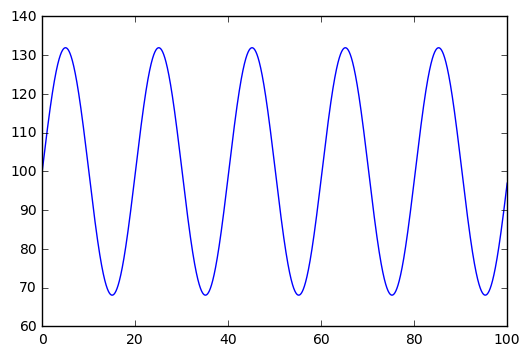

In [25]:
plot(ts,sol[:,0])